In [47]:
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
import pandas as pd
import pymc3 as pm

plt.style.use('ggplot')

In [16]:
def gen_data(N_samples = None, G_samples = None):

    # 这儿我们有3个组，每个组有30个样本
    N_samples =  [30, 30, 30] if not N_samples else N_samples

    # 每个组有18个正样本，也就说，有12个负样本
    G_samples =  [18, 18, 18] if not G_samples else G_samples

    # np.arange(len(N_samples)) = [0,1,2]
    # repaet一下就是， 0 repelat 30次， 1 repleat 30次， 2 repleat 30次
    # 这一句的作用就是给每一个样本一个索引
    group_idx = np.repeat(np.arange(len(N_samples)), N_samples)

    # 生成一个3个组的数据集
    data = []
    # 循环每个组，用了比较智障的np.repeat。。。。
    for i in range(0, len(N_samples)):
        data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]- G_samples[i]]))
    
    return data, group_idx

In [17]:
data, group_idx = gen_data()

**这就是一个愚蠢的0，1数据集，弄的还挺麻烦的样子**

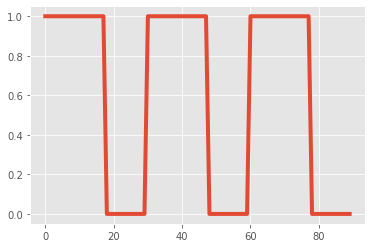

In [18]:
plt.plot(data, linewidth = 4)
plt.show()

我们知道这是一个伯努利分布

# 我们先看一个`Beta`

In [21]:
from scipy.stats import beta

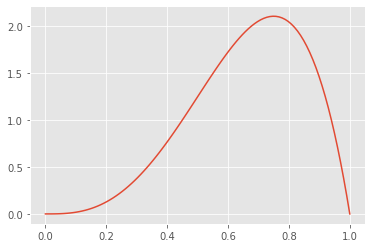

In [40]:
x = np.linspace(0,1,100)

plt.plot(x, [beta(a = 4, b=2).pdf(xx) for xx in x])

从这儿可以看到啊，beta有定义的地方，就是 0 - 1之间，包含 0 和 1

In [54]:
betas = [[a,b,x,beta(a = a, b = b).pdf(x) ]
    for a in range(1,11) 
    for b in range(1,11) 
    for x in [0.1,0,2,0.5,0.7,0.9,1,2,5,10,50,100]]
df = pd.DataFrame(betas,columns = ['a','b','x','betas'])
print("Where beta has a definition",df[df.betas >0]['x'].unique())
print('Where beta not having a definition',df[df.betas ==0]['x'].unique())

Where beta has a definition [0.1 0.  0.5 0.7 0.9 1. ]
Where beta not having a definition [  2.   5.  10.  50. 100.   1.   0.]


In [56]:
with pm.Model() as model:
    be = pm.Beta('be',alpha = 3,beta = 4)

比较一下`pymc`和`scipy.stats`的东西，发现是一样的

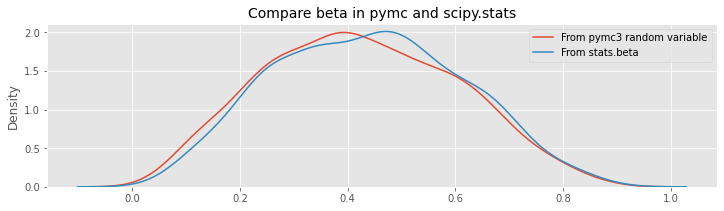

In [63]:
figsize(12,3)
sns.kdeplot(be.random(size = 1000), label = 'From pymc3 random variable')
sns.kdeplot(beta.rvs(a = 3, b =4, size = 1000), label = 'From stats.beta')
plt.legend(loc = 'upper right')
plt.title('Compare beta in pymc and scipy.stats', fontsize = 14)
plt.show()

**我们知道beta在0-1之间非常厉害，那说明，beta非常适合代表一个对概率的先验**               
`Bernoulli`和 `Binomial` 的参数`p`就是一个概率啊

# 然后我们继续看一个HalfCauchy

In [69]:
from scipy.stats import halfcauchy

从PYMC3来看，这个东西是带着一个参数beta的，大概是一个缩放的系数， 想象成抛物线的开口大小的缩放系数就好了

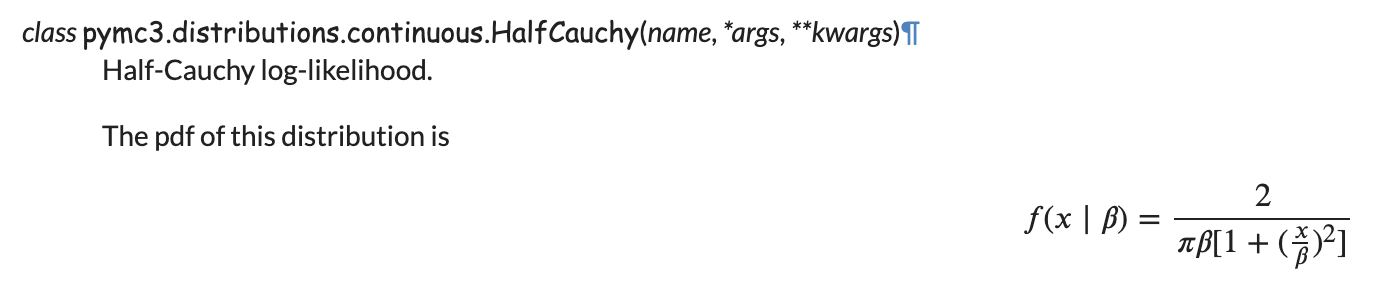

In [92]:
with pm.Model() as model:
    cau = pm.HalfCauchy('cau', beta = 100)

<AxesSubplot:ylabel='Density'>

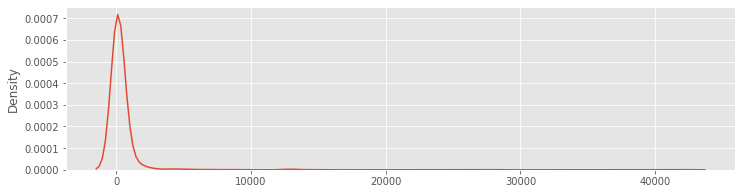

In [93]:
sns.kdeplot(cau.random(size = 1000))

# 然后我们继续上面的例子

In [66]:
import pprint

In [64]:
group_idx

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [68]:
pprint.pprint(data,compact = True)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
